In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.preprocessing import StandardScaler, LabelEncoder 
import warnings
warnings.filterwarnings("ignore")

In [141]:
df = pd.read_csv("data.csv")

In [142]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,84.09,False,1
1,Academic,A,Male,Less Interested,Urban,57,4410000,86.91,False,1
2,Academic,B,Female,Very Interested,Urban,50,6500000,87.43,False,1
3,Vocational,B,Male,Very Interested,Rural,49,6600000,82.12,True,1
4,Academic,A,Female,Very Interested,Urban,57,5250000,86.79,False,0


In [143]:
df.describe()

,parent_age,parent_salary,average_grades,will_go_to_college
count,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,52.208000,5.381570e+06,86.097200,0.50000
std,3.500427,1.397546e+06,3.378738,0.50025
min,40.000000,1.000000e+06,75.000000,0.00000
25%,50.000000,4.360000e+06,83.737500,0.00000
50%,52.000000,5.440000e+06,85.575000,0.50000
75%,54.000000,6.382500e+06,88.262500,1.00000
max,65.000000,1.000000e+07,98.000000,1.00000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   average_grades         1000 non-null   float64
 8   parent_was_in_college  1000 non-null   bool   
 9   will_go_to_college     1000 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 71.4+ KB


[Text(0.5, 1.0, 'Count based upon interest')]

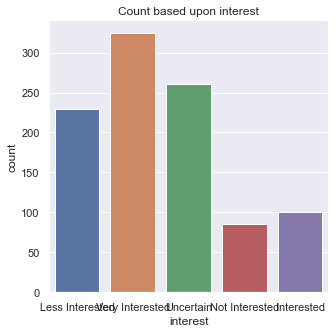

In [145]:
sns.countplot(data = df, x = "interest").set(title='Count based upon interest')

<AxesSubplot:xlabel='interest', ylabel='will_go_to_college'>

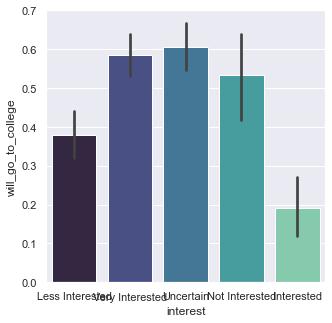

In [146]:
sns.barplot(x='interest', y='will_go_to_college', data=df, palette='mako')

<AxesSubplot:xlabel='residence', ylabel='will_go_to_college'>

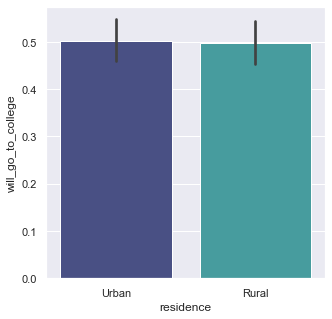

In [147]:
sns.barplot(x='residence', y='will_go_to_college', data=df, palette='mako')

<AxesSubplot:xlabel='average_grades', ylabel='will_go_to_college'>

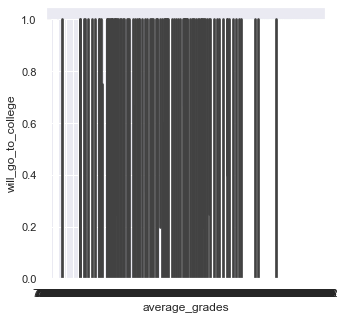

In [148]:
sns.barplot(x='average_grades', y='will_go_to_college', data=df, palette='mako')

[Text(0.5, 1.0, 'Student attending college based upon parents attended college')]

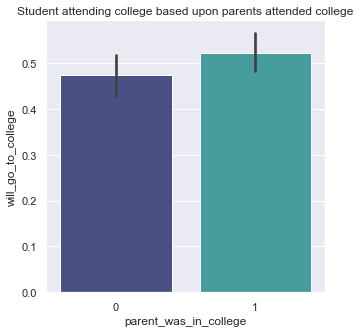

In [139]:
sns.barplot(x='parent_was_in_college', y='will_go_to_college', data=df, palette='mako').set(title='Student attending college based upon parents attended college')

<AxesSubplot:xlabel='parent_age', ylabel='will_go_to_college'>

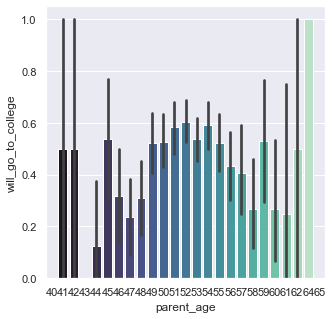

In [112]:
sns.barplot(x='parent_age', y='will_go_to_college', data=df, palette='mako')

In [113]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,parent_age,parent_salary,average_grades,parent_was_in_college,will_go_to_college
parent_age,1.000000,-0.286418,-0.006077,-0.438322,0.042873
parent_salary,-0.286418,1.000000,0.306712,0.106487,0.475693
average_grades,-0.006077,0.306712,1.000000,0.236713,0.505133
parent_was_in_college,-0.438322,0.106487,0.236713,1.000000,0.048038
will_go_to_college,0.042873,0.475693,0.505133,0.048038,1.000000


In [114]:
#One Hot Coding
encoder = LabelEncoder()
df["type_school"] = encoder.fit_transform(df["type_school"])
df["school_accreditation"] = encoder.fit_transform(df["school_accreditation"])
df["gender"] = encoder.fit_transform(df["gender"])
df["residence"] = encoder.fit_transform(df["residence"])
df["parent_was_in_college"] = encoder.fit_transform(df["parent_was_in_college"])
df["will_go_to_college"] = encoder.fit_transform(df["will_go_to_college"])

df["interest"] = df["interest"].map({"Not Interested":0, "Less Interested":1, "Uncertain":2, "Interested":3, "Very Interested":4})

df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,average_grades,parent_was_in_college,will_go_to_college
0,0,0,1,1,1,56,6950000,84.09,0,1
1,0,0,1,1,1,57,4410000,86.91,0,1
2,0,1,0,4,1,50,6500000,87.43,0,1
3,1,1,1,4,0,49,6600000,82.12,1,1
4,0,0,0,4,1,57,5250000,86.79,0,0


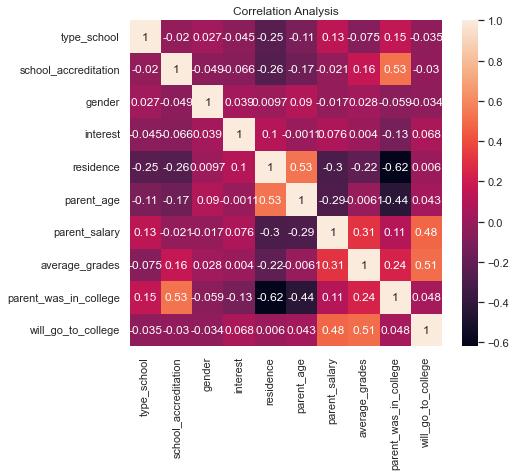

In [115]:
plt.figure(figsize = (7,6)) #13,10 -> width, height
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Analysis")
plt.show()

In [116]:
#Selecting Features
X= df[['interest','residence','parent_was_in_college','average_grades']]
Y= df['will_go_to_college']


In [117]:
#Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)
#print(X_train.shape,X_test.shape,X.shape, Y_train.shape, Y_test.shape)


In [118]:
#from sklearn.linear_model import LogisticRegression
#lgr = LogisticRegression(random_state=0).fit(X_train, Y_train)


In [119]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs')
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       151
           1       0.81      0.77      0.79       149

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [120]:
logisticScore = classifier.score(X_test, Y_test)
print(logisticScore)

0.7966666666666666


     interest  residence  parent_was_in_college  average_grades
521         1          1                      0           86.49
737         4          1                      0           85.46
740         0          0                      1           83.63
660         1          1                      0           88.30
411         4          1                      1           87.46
678         2          0                      1           93.78
626         4          1                      1           81.33
513         2          1                      0           87.97
859         1          0                      0           83.70
136         4          1                      1           92.08
---------------
[1 1 0 1 1 1 0 1 0 1]


<AxesSubplot:>

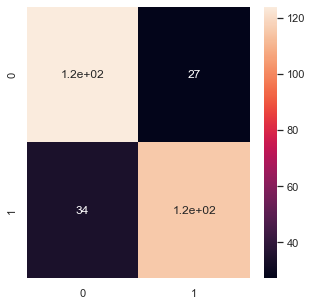

In [121]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print(X_test[:10])
print('-'*15)
print(y_pred[:10])
plt.rcParams['figure.figsize'] = (5, 5)
con_mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(con_mat, annot = True)

In [122]:
#Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron(tol=1e-3, random_state = 0)
perceptron.fit(X_train, Y_train)
y_pred_perc = perceptron.predict(X_test)

In [123]:
perceptronScore = perceptron.score(X_test, Y_test)
print(perceptronScore)

0.5033333333333333


In [124]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

In [126]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       151
           1       0.68      0.67      0.68       149

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300



In [127]:
KnnScore = knn.score(X_test, Y_test)
print(KnnScore)

0.68


In [128]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [129]:
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
rfscore = accuracy_score(Y_test, y_pred)
print(rfscore)

0.7


In [130]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       151
           1       0.69      0.71      0.70       149

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



In [131]:
#LightGBM Classifier Model
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(X_train, Y_train)

In [132]:
y_pred = lgbm_model.predict(X_test)
lightgbm = accuracy_score(Y_test, y_pred)
print(lightgbm)

0.7666666666666667


In [133]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


0.29501516781062065


<AxesSubplot:ylabel='will_go_to_college'>

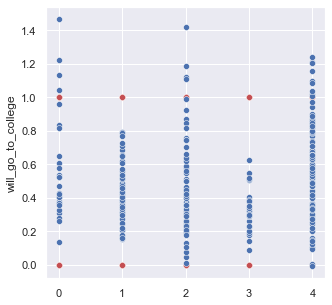

In [134]:
pr_res = make_pipeline(PolynomialFeatures(degree=2,include_bias=True),LinearRegression())
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_pred = np.asarray(Y_test)
p_model=pr_res.fit(X_train, Y_train)
yfit = pr_res.predict(X_test)
yfit_training = pr_res.predict(X_train)
print(p_model.score(X_test, Y_test))
sns.scatterplot(X_test[:,0],Y_test,color='r') # ground_truth
sns.scatterplot(X_test[:,0],yfit,color='b') # prediction

In [135]:
df_score = pd.DataFrame({
    "Model":['Logistic Regression', 'Perceptron Model','Knn Neighbour','Random Forest','LightGBM Classifier'],
    "Score":[logisticScore, perceptronScore, KnnScore, rfscore, lightgbm]
})

<AxesSubplot:xlabel='Model'>

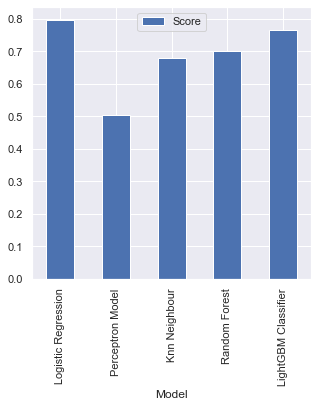

In [136]:
df_score.plot(x="Model", y="Score", kind="bar")

In [137]:
df_score = pd.DataFrame({
    "Model":['Logistic Regression', 'Random Forest'],
    "Score":[logisticScore, rfscore]
})

<AxesSubplot:xlabel='Model'>

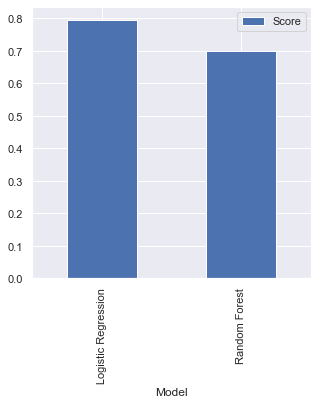

In [138]:
df_score.plot(x="Model", y="Score", kind="bar")